In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from entropy import kde

# single Gaussian distro

## create artificial data

In [3]:
data= np.random.randn(100000)

## perform kde

In [4]:
kernel = kde.kde(data=data,verbose=True)
xs, ys = kernel.pdf_x,kernel.pdf

Initializing C++ kernel for kde...
KDE finished.


## plot normalized histogram and kde

[Text(0, 0.5, 'probability denisty'), Text(0.5, 0, 'artificial dihedrals')]

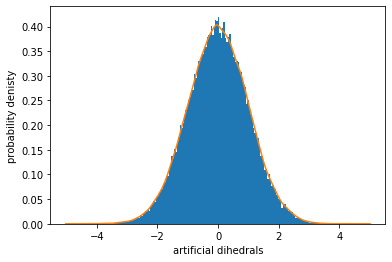

In [5]:
f,axs = plt.subplots()


axs.hist(data,180,density=True, label="histogram")


axs.plot(xs,ys, label="Entropy KDE")
axs.set(xlabel="artificial dihedrals", ylabel="probability denisty")

# binodal distribution

## create artificial data

In [6]:
def binodal_data(n_samples=1001):
    n1 = n_samples//2
    n2 = n_samples-n1
    p1 = np.random.randn(n1)*10-90
    p2 = np.random.randn(n2)*10+90

    return np.concatenate([p1,p2])

In [7]:
data= binodal_data(50000)

## perform kde

In [8]:
kernel = kde.kde(data=data,verbose=True)
xs, ys = kernel.pdf_x,kernel.pdf

Initializing C++ kernel for kde...
KDE finished.


## plot normalized histogram and kde

[Text(0, 0.5, 'probability denisty'), Text(0.5, 0, 'artificial dihedrals')]

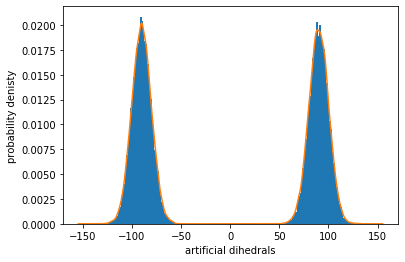

In [9]:
f,axs = plt.subplots()


axs.hist(data,180,density=True, label="histogram")


axs.plot(xs,ys, label="Entropy KDE")
axs.set(xlabel="artificial dihedrals", ylabel="probability denisty")

# binodal distribution with unequal weights

## create artificial data

In [10]:
n_data = 50000
data= binodal_data(n_data)
weights = np.concatenate([np.ones(int(n_data/2)),np.ones(int(n_data/2))*2])
weights /=np.sum(weights)

In [11]:
weights

array([1.33333333e-05, 1.33333333e-05, 1.33333333e-05, ...,
       2.66666667e-05, 2.66666667e-05, 2.66666667e-05])

## perform kde

In [14]:
kernel = kde.kde(data=data,weights=weights,verbose=True)

kernel.has_weights

True

In [15]:
xs, ys = kernel.pdf_x,kernel.pdf

Initializing C++ kernel for kde...
KDE finished.


## plot non--weighted histogram and weighted kde

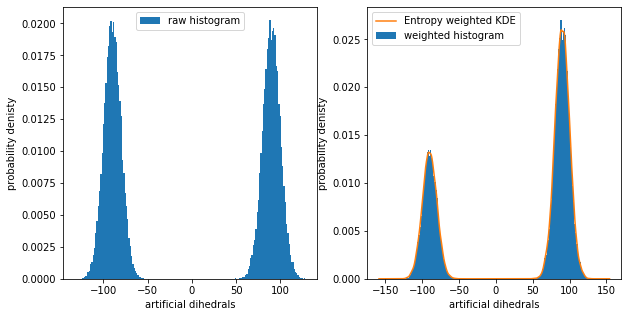

In [26]:
f,axs = plt.subplots(ncols=2, figsize=(10,5))

axs[0].hist(data,bins=180,density=True, label="raw histogram")

axs[1].hist(data,bins=180,weights=weights,density=True, label="weighted histogram")


axs[1].plot(xs,ys, label="Entropy weighted KDE")
for ax in axs:
    ax.set(xlabel="artificial dihedrals", ylabel="probability denisty")
    ax.legend()

# Feel free to try with oder data

In [ ]:
data = [] # ...